# Single Camera Paper Results Generation and Plotting

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from collections import defaultdict
import os
import json
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../..") # Adds higher directory to python modules path.

from utilitysimv4 import Camera, InferenceJob, TrainingJob, MultiPeriodSimulator, fair_naive_scheduler, fair_dumb_scheduler, fair_sco_scheduler, fair_random_scheduler, inference_only_scheduler, single_camera_naive, get_optimus_fn, thief_sco_scheduler, single_camera_optimizer, get_tanh_fn, get_linear_fn, get_infer_profile, get_tanh_fn, simulator, thief_scheduler, fair_scheduler

In [3]:
aspect = 1.3
height = 2.5
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

params = {'axes.labelsize': 'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [27]:
# !!!!!!! CONFIGURE THESE PARAMS !!!!!!!!
dataset = 'waymo' #'cityscapes'
pred_mode = 'datadist'# 'datadist'

In [28]:
PROFILE_DIR = '/home/romilb/research/msr/results/profiling/new_profiling/{}/meta/profiles'.format(dataset)
INFERENCE_PROFILE_PATH = '../real_inference_profiles.csv'
INFERENCE_MAX_DEFAULT = 0.25
PLOT_PATH = './camready_plots/'
os.makedirs(PLOT_PATH, exist_ok=True)

In [29]:
l=os.listdir(PROFILE_DIR)
cities=[x.split('.')[0] for x in l]
print(cities)

[]


In [30]:
all_data = pd.read_csv('data_eval_singlecam_{}_{}.csv'.format(dataset,pred_mode))

# Cost vs accuracy - Single Cam

In [31]:
PERIOD=200
USE_ORACLE_INFO = True
d = all_data
d = d[d['use_oracle'] == USE_ORACLE_INFO]
d = d[d['period'] == PERIOD]
scheds = ['inference_only', 'fair_dumb','thief']

In [32]:
cities

[]

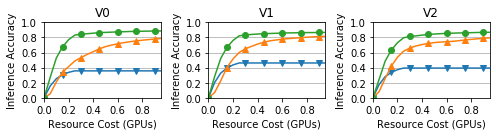

In [34]:
# Cost vs Resource
nrow = 1; ncol = 3;
fig, axs = plt.subplots(figsize=[7,2], nrows=nrow, ncols=ncol)

axs = axs.reshape(-1)
cities = d.city.unique()
#cities = ['zurich'] if dataset == 'cityscapes' else ['phx-41-60_1']
cities_to_plot = [cities[2], cities[4], cities[9]] if dataset == 'cityscapes' else [cities[0], cities[1], cities[2]]
city_ids= [2,4,9] if dataset == 'cityscapes' else [0,1,2]
for i,city in enumerate(cities_to_plot):
    ax = axs[i]
    temp_df = d[d['city']==city]
    temp_df.plot(x='resources', y=scheds, kind='line', ax=ax,
                        title="V{}".format(city_ids[i]),
                        legend=False, style=['v-', '^-', 'o-'],markevery=3,
                     label = ["No-retrain", "Fair Scheduler", "Ekya"])
    ax.set_ylim([0,0.95])
    ax.set_ylabel('Inference Accuracy')
    ax.set_xlabel('Resource Cost (GPUs)')

    x_tick_range = np.arange(0,1,0.2)
    ax.set_xticks(x_tick_range)
    ax.set_xticklabels(["{:.1f}".format(x) for x in x_tick_range])
    #ax.set_xlim([0.8, 8.2])

    y_tick_range = np.arange(0,1.1,0.2)
    ax.set_yticks(y_tick_range)
    ax.set_yticklabels(["{:.1f}".format(x) for x in y_tick_range])
    plt.tight_layout()
    ax.yaxis.grid(True)
    handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,1.12), ncol=3)

#lgd = plt.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2, prop={'size': 'small'})
plt.tight_layout()
plt.savefig(os.path.join(PLOT_PATH, "singlecam_acc_vs_cost_{}.pdf".format(dataset)), bbox_inches='tight')